In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
%matplotlib inline 
import datetime
import pandas as pd
from pandas import DataFrame,date_range

In [15]:
data = pd.read_csv('Grant_0408_0410.txt',sep='\t',header=1,skiprows=[2,3])
df = data[367:1807] # how to slice 

In [16]:
timestamp = pd.to_datetime(df['TIMESTAMP'])
#O3_ppm = data2['O3']

In [17]:
RN = df['RECORD']
batt_volts = df['BattV']
ptemp_C = df['PTemp_C']
O3_ppm = df['O3']
NO2_ppm = df['NO2']
SO2_ppm = df['SO2']
CO_ppm = df['CO']
VOC_ppm = df['VOC']
NMHC_ppm = df['NMHC']
temp_C = df['AirTC']
RH = df['RH']
wspd1 = df['WS_ms_2']
wdir1 = df['WindDir']
wspd2 = df['WS_ms']
flx_down = df['H_FlxDSlrkW']*1000
tot_down = df['H_TFlxSlrMJ_Tot']
flx_up = df['L_FlxDSlrkW']*1000
tot_up = df['L_FlxSlrMJ_Tot']
wvect_spd = df['WS_ms_2_S_WVT']
wvect_dir = df['WindDir_D1_WVT']

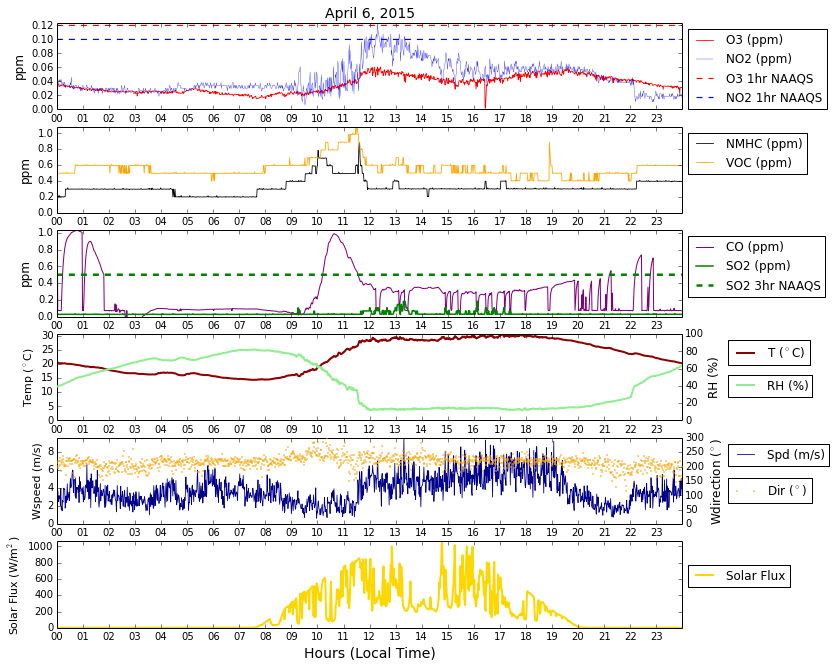

In [24]:
plt.figure(figsize=[14,12])

timestamp = timestamp.astype(datetime.datetime)
xfmt = mdates.DateFormatter('%H')

ax1 = plt.subplot(6,1,1)
ax1.xaxis.set_major_formatter(xfmt)
ax1.xaxis.set_major_locator(mdates.HourLocator())
plt.gcf().autofmt_xdate()
ax1.plot(timestamp,O3_ppm,linewidth=0.8, c='r',label='O3 (ppm)')
ax1.plot(timestamp,NO2_ppm,linewidth=0.3, c='blue',label='NO2 (ppm)')
zeros = O3_ppm*0
ax1.plot(timestamp,zeros+0.12,c='r',linewidth=1.2,linestyle='--',label='O3 1hr NAAQS')
ax1.plot(timestamp,zeros+0.1,c='b',linewidth=1.2,linestyle='--',label='NO2 1hr NAAQS')
ax1.set_title('April 6, 2015',fontsize=14)
ax1.set_ylabel('ppm',fontsize=12)
ax1.set_ylim(0,max(NO2_ppm))
         
ax2 = plt.subplot(6,1,2)
ax2.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_locator(mdates.HourLocator())
ax2.plot(timestamp,NMHC_ppm, linewidth=0.8, c='black',label='NMHC (ppm)')
ax2.plot(timestamp,VOC_ppm, linewidth=0.8, c='orange',label='VOC (ppm)')
ax2.set_ylabel('ppm', fontsize=12)
ax2.set_ylim(0,max(VOC_ppm))    

ax3 = plt.subplot(6,1,3)
ax3.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_locator(mdates.HourLocator())
ax3.plot(timestamp,CO_ppm, linewidth=1,c='purple',label='CO (ppm)')
ax3.plot(timestamp,SO2_ppm, linewidth=1.5,c='g',label='SO2 (ppm)')
#ax3.plot(timestamp,zeros+9,c='purple',linewidth=1.2,linestyle='--',label='CO 8hr NAAQS')
ax3.plot(timestamp,zeros+0.5,c='g',linewidth=2.5,linestyle='--',label='SO2 3hr NAAQS')
ax3.set_ylabel('ppm', fontsize=12)
ax3.set_ylim(0,max(CO_ppm))

ax5 = plt.subplot(6,1,4)
ax5.xaxis.set_major_formatter(xfmt)
ax5.xaxis.set_major_locator(mdates.HourLocator())
ax5.set_ylim(0,max(temp_C))
ax5.plot(timestamp,temp_C, linewidth=2, c='darkred',label = 'T ($^\circ$C)')
ax5.set_ylabel('Temp ($^\circ$C)', fontsize=11)

ax6 = ax5.twinx()
ax6.xaxis.set_major_formatter(xfmt)
ax6.xaxis.set_major_locator(mdates.HourLocator())
ax6.set_ylim(0,100)
ax6.plot(timestamp,RH, linewidth=2, c='lightgreen',label = 'RH (%)')
ax6.set_ylabel('RH (%)', fontsize=12)

ax7 = plt.subplot(6,1,5)
ax7.xaxis.set_major_formatter(xfmt)
ax7.xaxis.set_major_locator(mdates.HourLocator())
ax7.set_ylim(0,max(wspd1))
ax7.plot(timestamp,wspd1,linewidth=0.8,c='darkblue',label = 'Spd (m/s)')
ax7.set_ylabel('Wspeed (m/s)', fontsize=11)

ax8 = ax7.twinx()
ax8.xaxis.set_major_formatter(xfmt)
ax8.xaxis.set_major_locator(mdates.HourLocator())
ax8.set_ylim(0,max(wdir1))
ax8.plot(timestamp,wdir1,marker='.',markersize=2,linestyle='none',c='orange',label = 'Dir ($^\circ$)')
ax8.set_ylabel('Wdirection ($^\circ$)', fontsize=12)

ax9 = plt.subplot(6,1,6)
ax9.xaxis.set_major_formatter(xfmt)
ax9.xaxis.set_major_locator(mdates.HourLocator())
ax9.set_ylim(0,max(flx_up))
ax9.plot(timestamp,flx_up, linewidth=2, c='gold',label='Solar Flux')
ax9.set_ylabel('Solar Flux (W/m$^2$)', fontsize=11)
ax9.set_xlabel('Hours (Local Time)', fontsize=14)

box1 = ax1.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.8, box1.height])
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])
box3 = ax3.get_position()
ax3.set_position([box3.x0, box3.y0, box3.width * 0.8, box3.height])
#box4 = ax4.get_position()
#ax4.set_position([box4.x0, box4.y0, box4.width * 0.8, box4.height])
box5 = ax5.get_position()
ax5.set_position([box5.x0, box5.y0, box5.width * 0.8, box5.height])
box6 = ax6.get_position()
ax6.set_position([box6.x0, box6.y0, box6.width * 0.8, box6.height])
box7 = ax7.get_position()
ax7.set_position([box7.x0, box7.y0, box7.width * 0.8, box7.height])
box8 = ax8.get_position()
ax8.set_position([box8.x0, box8.y0, box8.width * 0.8, box8.height])
box9 = ax9.get_position()
ax9.set_position([box9.x0, box9.y0, box9.width * 0.8, box9.height])

ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax3.legend(loc='upper left', bbox_to_anchor=(1, 1))
#ax4.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax5.legend(loc='upper left', bbox_to_anchor=(1.065, 1))
ax6.legend(loc='upper left', bbox_to_anchor=(1.065, 0.6))
ax7.legend(loc='upper left', bbox_to_anchor=(1.065, 1))
ax8.legend(loc='upper left', bbox_to_anchor=(1.065, 0.6))
ax9.legend(loc='upper left', bbox_to_anchor=(1, 0.8))

plt.show()

In [260]:
# time2, O3_new = np.loadtxt("Grant_0405_0406.txt", unpack=True,converters={ 0: mdates.strpdate2num('%dd/%mm/%YY %HH:%MM')})

# plt.plot_date(x=timestamp, y=O3_ppm)
# plt.title("Pageessions on example.com")
# plt.ylabel("Page impressions")
# plt.grid(True)
# plt.show()

In [261]:
# def parse_date(raw_date):
#     return datetime.datetime.strptime(raw_date, '%d/%m/%Y %H:%M').date()

# df['TIMESTAMP'] = df['TIMESTAMP'].map(parse_date)

In [262]:
# timestamp = pd.to_datetime(df['TIMESTAMP'])
# date_index = pd.DatetimeIndex(timestamp, Freq='H')

# start = '4/6/2015 18:00:00'
# end = '4/8/2015 18:10:00'
# rng = pd.date_range(start, end, freq='T') # T for minute frequency
# print rng
# # print O3_ppm.index(date_index)
# # print rng

# # ts = df.loc[date_index,O3_ppm]

# # ts.describe()